# <center>Enhancing Research Software Sustainability through Modular Open-Source Software Templates</center>

<div>
    <img src="img/hereon_logo_quer_03_rgb.jpg" width="70%" style="margin-bottom: 2em">       
    <hr>
    <img src="img/HCDC_final_Print.jpg" width="70%" style="margin-top: 2em">
</div>

## deRSE24

Philipp S. Sommer, Björn Saß, Markus Benninghoff

Helmholtz-Zentrum Hereon,
Helmholtz Coastal Data Center

March 7th, 2024

---

<img src="img/software-templates-tutorial-qr.png" alt="QR Code" width="300px"/>

https://codebase.helmholtz.cloud/hcdc/software-templates/demos/software-templates-tutorial

[Help](#/1/0)

## Technical Note <a id='help'></a>

This presentation is a jupyter notebook presented with [rise][rise] for interactive execution of the cells. For more info on how to navigate in a rise presentation, please [read the docs][rise-usage].

You can run it interactively on mybinder in your browser: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fcodebase.helmholtz.cloud%2Fhcdc%2Fsoftware-templates%2Fdemos%2Fsoftware-templates-tutorial/main?filepath=software-templates-tutorial.ipynb)

The link to the repo on GitLab: https://codebase.helmholtz.cloud/hcdc/software-templates/demos/software-templates-tutorial

[Back to first slide](#/0/0)

[rise]: https://rise.readthedocs.io
[rise-usage]: https://rise.readthedocs.io/en/latest/usage.html#running-a-slideshow

### Troubleshooting

On mybinder.org, it might happen, that your kernel dies (or the entire jupyter hub). If that happens:

1. try to restart the kernel by clicking `Kernel` -> `Restart`. If this succeds, select the cell in the notebook where it crashed and click `Cell` -> `Run All Above`
2. If you could not restart the kernel, it might be that mybinder deleted your session. You then need to request a new server by clicking
  [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fcodebase.helmholtz.cloud%2Fhcdc%2Fsoftware-templates%2Fdemos%2Fsoftware-templates-tutorial/main?filepath=software-templates-tutorial.ipynb)
  and you have to select the cell in the notebook where it crashed and click `Cell` -> `Run All Above`
3. Optional: Press `Alt-r` to go back to fullscreen/slideshow-mode.


In [ ]:
# We are using git in this setup and need to commit
# some files. These files won't be pushed anywhere,
# but for commiting file, we need to configure a
# user in the local setup (if this has not yet been 
# done).

git config user.name || git config --global user.name "Some Name"
git config user.email || git config --global user.email "someone@example.com"

## Outline

### Scope of this tutorial

In this tutorial, you will learn the basics and ideas on the workflow that is behind the HCDC software templates.

For demonstration purpose, we'll use the Python Package Template to create and use a template. The outcome will be among other things a command-line application and a documentation.

### Content

1. **cookiecutter and cruft: The basics about templates**
2. **Starting with a real template**
3. **Extend and use the template**


<h2 class="section-heading">1. cookiecutter and cruft: The basics about templates</h2>

## Templating with cookiecutter

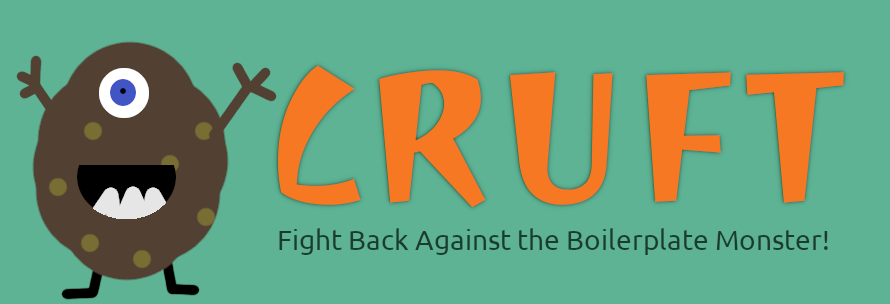

We will use [cruft](https://cruft.github.io/cruft/) for generating our code.  

- based on so-called [`cookiecutter`](https://cookiecutter.readthedocs.io/en/stable/) templates
- it defines template variables in a `cookiecutter.json` file
- and injects the variables with Jinja2-Templates syntax

### Hello World cookiecutter

First we need to create a template folder (named <font color='#4f997e'>**my-template**</font>) and fill it with a cookiecutter project template.

In [ ]:
rm -rf my-template  # remove template folder (in case it already exists)
mkdir -p my-template
cat > my-template/cookiecutter.json << EOF
{
    "project_slug": "my-awesome-project"
}
EOF

In the <font color='#4f997e'>**my-template**</font> folder we create another folder with the placeholder `{{cookiecutter.project_slug}}` and add a Markdown file (called `hello_world.md`), with a single line of text. 

In [ ]:
mkdir "my-template/{{cookiecutter.project_slug}}"
cat > "my-template/{{cookiecutter.project_slug}}/hello-world.md" << EOF
This is the start of {{ cookiecutter.project_slug }}...
EOF
tree my-template


Next we use `cookiecutter` to create a new project (new folder) with the default variables. The folder will be named after the variable (<font color='#f77722'>**my-awesome-project**</font>).

In [ ]:
rm -rf my-awesome-project  # remove template folder (in case it already exists)
cookiecutter my-template --no-input
ls my-awesome-project

The folder contains the rendered Markdown file with the expected text.

In [ ]:
cat my-awesome-project/hello-world.md

We are done with the `cookiecutter` demo, let's clean up and remove <font color='#f77722'>**my-awesome-project**</font>.

In [ ]:
rm -r my-awesome-project

### Hello World cruft

Cruft requires git. We initiate the <font color='#4f997e'>**my-template**</font> folder as a git repo.

In [ ]:
git -C my-template init -q
git -C my-template add .
git -C my-template commit -q --no-gpg-sign -m "Initial commit"

Instead of cookiecutter, we are using `cruft` to create a new project, still named <font color='#7f634d'>**my-awesome-project**</font>.

In [ ]:
cruft create my-template --no-input
tree -a my-awesome-project

Inside <font color='#7f634d'>**my-awesome-project**</font> is now a `cruft` definition file, containing not only the `cookiecutter` variables, but also the last git commit.

In [ ]:
cat my-awesome-project/.cruft.json


We keep the folder <font color='#7f634d'>**my-awesome-project**</font> for now...

### Updating with cruft

We initiate a  git repo in <font color='#7f634d'>**my-awesome-project**</font>.

In [ ]:
git -C my-awesome-project init -q
git -C my-awesome-project add .
git -C my-awesome-project commit -q --no-gpg-sign -m "Initial commit"

Back in our <font color='#4f997e'>**my-template**</font> folder we update the Markdown file and add a new line.

In [ ]:
cat >> "my-template/{{cookiecutter.project_slug}}/hello-world.md" << EOF
...and this is an another update to our {{ cookiecutter.project_slug }}
EOF
cat "my-template/{{cookiecutter.project_slug}}/hello-world.md"
git -C my-template commit -q --no-gpg-sign -am "Update hello-world.md"

Now we can update <font color='#7f634d'>**my-awesome-project**</font> with cruft.

In [ ]:
cruft update -p my-awesome-project -y

The Markdown file in <font color='#7f634d'>**my-awesome-project**</font> now shows the latest updates.

In [ ]:
cat my-awesome-project/hello-world.md

We can add the changes to our git in <font color='#7f634d'>**my-awesome-project**</font>.

In [ ]:
git -C my-awesome-project commit -q --no-gpg-sign -am "Updated repo with cruft"

We are done with the `cruft` demo, let's clean up and remove <font color='#7f634d'>**my-awesome-project**</font> and <font color='#4f997e'>**my-template**</font>.

In [ ]:
rm -rf my-template my-awesome-project

<h2 class="section-heading">2. Starting with a real template</h2>

### The python-package-template

---

**Usage:**

```bash
cruft create --skip .git --skip .mypy_cache https://codebase.helmholtz.cloud/hcdc/software-templates/python-package-template.git

```

---

**A template to create a python package**

- implements state-of-the-art SE- and RSE-practices
  - packaging
  - building on multiple OS
  - automated linting
  - automated formatting
  - automated documentation
  - automated tests
  - pre-commit
- creates a git repository
- provides instructions on how to get started based on the user input
- automatically tested with Gitlab CI

> **Scope for this tutorial:**
>
> Create your own template based upon the python-package-template

<img src="img/python-package-template-qr.png" alt="python-package-template" width="300px"/>

https://codebase.helmholtz.cloud/hcdc/software-templates/python-package-template

### Getting to know the source

Clone the repository into the folder <font color='#4f8f99'>**python-package-template**</font>.

In [ ]:
# delete any existing test folder
rm -rf python-package-template/

# get the template source from gitlab
git clone https://codebase.helmholtz.cloud/hcdc/software-templates/python-package-template.git

We confirm that everything from the [repository](https://codebase.helmholtz.cloud/hcdc/software-templates/python-package-template) is in our folder <font color='#4f8f99'>**python-package-template**</font>.


- `cookiecutter.json`: the template parameters
- `{{cookiecutter.project_slug}}`: the template files
- `{{cookiecutter.package_folder}}`: template files for basic python module 
- `docs`: basis for a sphinx-based documentation for the package
- `tests`: basis for unit-testing of the package
- `test`: bats-based unit tests for the template itself
- `hooks`: contains a `post_gen_hook.py` file that creates a git repository upon usage of the template and prints out further instructions

In [ ]:
tree -ad -I .git python-package-template/

In [ ]:
ls -a python-package-template

### What this template provides

#### Package metadata

renders metadata, packaging information, linter config, etc.

In [ ]:
find . -name pyproject.toml

#### pre-commit setup

renders hooks that check the code prior to commiting

In [ ]:
find . -name .pre-commit-config.yaml

#### unit test setup

renders setup to test the data

In [ ]:
find . -name tox.ini

#### gitlab CI

renders code to build, test and deploy the package

In [ ]:
find . -name .gitlab-ci.yml

#### setup for docs

renders sphinx-setup for building the documentation including API reference, either in markdown or sphinx

In [ ]:
ls python-package-template/*/docs/

#### CITATION.cff

renders machine- and human-readable citation information on the package

In [ ]:
find python-package-template -name CITATION.cff

### Linting and formatting

The package is equipped and configured for multiple code checkers and formatters, including pre-commit hooks

- [.pre-commit-config.yaml](https://codebase.helmholtz.cloud/hcdc/software-templates/python-package-template/-/blob/main/%7B%7Bcookiecutter.project_slug%7D%7D/.pre-commit-config.yaml)
- [contributing.md](https://codebase.helmholtz.cloud/hcdc/software-templates/python-package-template/-/blob/main/%7B%7Bcookiecutter.project_slug%7D%7D/docs/contributing.md)

### Formatters

- pre-commit-hooks
- isort
- black
- blackdock

### Linters

- flake8
- mypy
- reuse
- cff-converter-python

In [ ]:
grep 'repo:' python-package-template/*/.pre-commit-config.yaml

**but this is out of scope for today**

<h2 class="section-heading">3. Extend and use the template</h2>

## Creating a command-line template

### Our aim

> make an analysis script supplementary to a journal publication available as python package for better reproducibility

### Our job

> adapt the template such, that it renders a package providing a command-line utility, including documentation.

### What we need to do

1. Create a [`__main__.py` script][main] to implement the cli
2. Adapt the python packages to make [a function available from the command-line][scripts]
3. use [argparse][argparse] to handle command-line parameters in this script
4. use [sphinx-argparse] to document these command-line parameters

[main]: https://docs.python.org/3/library/__main__.html#main-py-in-python-packages
[scripts]: https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#creating-executable-scripts
[argparse]: https://docs.python.org/3/library/argparse.html
[sphinx-argparse]: https://pypi.org/project/sphinx-argparse/

### Creating the main script

Python modules can contain a `__main__.py` file that will be executed when you call `python -m <name-of-the-module>`. A simple example for `__main__.py` would be

```python
if __name__ == "__main__":
    print("Hello from main")
```

We create a `__main__.py` in the package folder:

```
python-package-template/
└── {{cookiecutter.project_slug}}
    └── {{cookiecutter.package_folder}}
        └── __main__.py
```

In [ ]:
# create the main file
cat > python-package-template/{{cookiecutter.project_slug}}/{{cookiecutter.package_folder}}/__main__.py << EOF
"""Command-line interface for {{ cookiecutter.project_slug }}"""

def main():
    print("Hello world!")
    
if __name__ == "__main__":
    main()

EOF

## Verifying your work

We can now instanciate our template and check whether everything works. A useful approach is to use the `--no-input` argument to `cruft` which will then take the defaults that are defined in the [`cookiecutter.json` file](../edit/python-package-template/cookiecutter.json). This means, that it will use the default project slug (`my-python-package`)

> `cruft create` gives multiple instructions at the end that are defined in the [`post_gen_project.py`](../edit/python-package-template/hooks/post_gen_project.py) hook. **We can ignore them here** as they are reflected in our second command where we commit the files.

We add and commit everything previously changed in our <font color='#4f8f99'>**python-package-template**</font> folder to git.

In [ ]:
git -C python-package-template add .
git -C python-package-template commit --no-gpg-sign -m "Add __main__ module"

We use `cruft` to create a project, called <font color='#7f7c4d'>**my-python-package**</font> in `/tmp/`. 

The instructions in the output can be ignored in this step.

> When you cannot see the entire output of this command in the presentation, then go to the previous slide, and back to this slide. Then jupyter will render a scrollbar

In [ ]:
# delete any existing test folder
rm -rf /tmp/my-python-package/

# create the package (stay calm, this step might need some time in the beginning)
cruft create --skip .git --skip .mypy_cache --no-input python-package-template --output-dir /tmp/

In our <font color='#7f7c4d'>**my-python-package**</font> folder we add the license, and add and commit everything to our git.

In [ ]:
# commit the files
(cd /tmp/my-python-package && 
python .reuse/add_license.py code .cruft.json &&
git add .cruft.json* &&
git -C /tmp/my-python-package commit -a --no-gpg-sign -m "initial commit"
)

Test if the command line interface (CLI) works

In [ ]:
PYTHONPATH=/tmp/my-python-package python -m my_python_package

**But** running these tests manually is error-prone and/or too much effort. Therefore, the software templates usually have a systemized approach: _automated unit testing_.

We will do this now...

## The template test suite

The <font color='#4f8f99'>**python-package-template**</font> implements multiple unit tests to make sure, our packages work as intended. We use [`bats`][bats] for this. You can run the tests locally.

[bats]: https://bats-core.readthedocs.io/en/stable/index.html

Load and initiate the submodules (`bats`)

In [ ]:
git -C python-package-template submodule update --init

Run the tests by calling `test/bats/bin/bats` from the <font color='#4f8f99'>**python-package-template**</font> folder.

In [ ]:
(cd python-package-template && test/bats/bin/bats test/test_package.bats)

**Hint:** If the above code does not exist, open a new terminal [here](../lab) and copy-paste the following command there.

```bash
(cd python-package-template && test/bats/bin/bats test/test_package.bats)
```

### Implement a test for the CLI

To test our command-line utilities, we can create our own unit tests

Unit tests are written in a shell testing framework using bats

https://bats-core.readthedocs.io/en/stable/index.html

In [ ]:
cat > python-package-template/test/test_cli.bats << EOF
# Unit tests for the command-line interface
# SPDX-FileCopyrightText: 2024 Helmholtz-Zentrum hereon GmbH
#
# SPDX-License-Identifier: MIT

setup() {
    # initial loader of testing utility commands
    load 'test_helper/common-setup'
    _common_setup
}

@test "test calling the main module" {
    # create a new package and call the __main__ module
    create_template
    PYTHONPATH=\${PROJECT_FOLDER} run python -m my_python_package
    assert_output "Hello world!"
    
}

EOF

Run the test.

In [ ]:
(cd python-package-template && test/bats/bin/bats --verbose-run test/test_cli.bats)

## Editing pyproject.toml

To enable command-line execution of our analysis, we need to add a new section to the `pyproject.toml` file. Python packages can define [executable scripts][scripts] that make certain commands available from the shell. We can use this functionality to make our analysis executable from the command-line.

For this, we need to add a `project.scripts` section to the `pyproject.toml` configuration file that defines the script with the syntax `name-of-the-executable = <module>:<function>`. 

We can use our template syntax here, as our package name is dynamic

[scripts]: https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#creating-executable-scripts

In [ ]:
cat >> python-package-template/{{cookiecutter.project_slug}}/pyproject.toml << EOF

[project.scripts]
{{ cookiecutter.project_slug }} = "{{ cookiecutter.package_folder }}.__main__:main"

EOF

## Tests, tests, tests

We should implement a test to make sure our command-line setup is working.

In [ ]:
cat >> python-package-template/test/test_cli.bats << EOF



@test "test calling the executable" {
    # create a new package and call the __main__ module
    create_template
    # creates a virtual environment to make the 
    # executable available in the shell
    setup_venv
    # run the executable
    run my-python-package
    assert_output "Hello world!"
    
}

EOF

Run the test.

In [ ]:
(cd python-package-template && test/bats/bin/bats --verbose-run test/test_cli.bats)

## About command-line arguments

Printing *Hello World!* is nice, but not very useful. A real command-line application usually accepts command-line arguments. 

### Examples

- When we ran `python -m my_python_package`, then `-m my_python_package` have been command-line arguments to the command `python`.
- A common argument for a command line executable is the `-h` option:

In [ ]:
python -h | grep -- '-m'

It's good practice, that our command-line scripts do this as well, and luckily, there is a builtin python package `argparse` that helps us in creating a command-line parser.

## Adding the setup for command-line arguments

Let's rewrite our `__main__.py` code such that we create a command-line parser.

In [ ]:
# create the main file
cat > python-package-template/{{cookiecutter.project_slug}}/{{cookiecutter.package_folder}}/__main__.py << EOF
"""Command-line interface for {{ cookiecutter.project_slug }}"""
import argparse

def get_parser() -> argparse.ArgumentParser:
    parser = argparse.ArgumentParser()
    return parser

def main():
    parser = get_parser()
    args = parser.parse_args()  # noqa: F841
    
    # do something
    print("Hello world!")
    
if __name__ == "__main__":
    main()

EOF

## Running the test suite again
Let's check, if we broke something

In [ ]:
(cd python-package-template && test/bats/bin/bats --verbose-run test/test_cli.bats)

## Documenting the command-line arguments with sphinx

Having a command-line utility is fine, but it's good practice to additionally provide an online documentation about it. Fortunately, there is [`sphinx-argparse`][sphinx-argparse] that can help us. It's an extension for `sphinx` that we use here to render the docs. So let's add `sphinx-argparse` to the template in three steps:

1. add `sphinx-argparse` to the `docs` extra requirements in the `pyproject.toml`
2. add the `sphinxarg.ext` module to the list of extensions in `conf.py`
3. create a documentation file (for simplicity, we only implement this now in markdown) for the command-line arguments

[sphinx-argparse]: https://pypi.org/project/sphinx-argparse/

In [ ]:
# modify pyproject.toml
sed -i '/docs = \[/a \ \ \ \ "sphinx-argparse",' python-package-template/{{cookiecutter.project_slug}}/pyproject.toml

# modify conf.py
sed -i '/^extensions = \[/a \ \ \ \ "sphinxarg.ext",' python-package-template/{{cookiecutter.project_slug}}/docs/conf.py

# modify index.md to include the cli file
sed -i '/^api$/a cli' python-package-template/{{cookiecutter.project_slug}}/docs/index.md

In [ ]:
# create RST file

cat << \EOF > python-package-template/{{cookiecutter.project_slug}}/docs/cli.md
```{highlight} bash
```

(command-line)=

# Command line usage

The {mod}`{{ cookiecutter.package_folder }}.__main__` module can be used
from the command line via

```bash
    python -m {{ cookiecutter.package_folder }} [options] [arguments]
```

or via

```bash
    {{ cookiecutter.project_slug }} [options] [arguments]
```

```{argparse}
:module: {{ cookiecutter.package_folder }}.__main__
:func: get_parser
:prog: {{ cookiecutter.project_slug }}

EOF

## Test building the docs

To make sure, we did not break things, we can test building the docs

In [ ]:
(cd python-package-template && test/bats/bin/bats --verbose-run test/test_docs_creation.bats)

## Updating our previous package

Now we can commit our changes in the <font color='#4f8f99'>**python-package-template**</font> with the docs and update <font color='#7f7c4d'>**my-python-package**</font> with `cruft`.

In [ ]:
git -C python-package-template add .
git -C python-package-template commit --no-gpg-sign -m "improve CLI"

**Finally** implement all the changes done to our template to our python package with `cruft` with a simple one-liner!

In [ ]:
cruft update -p /tmp/my-python-package -y

## Test building the docs

We can build the docs now to check if everything works as it should

In [ ]:
# install the necessary libraries for building the docs 
# into the current environment
make -C /tmp/my-python-package dev-install

In [ ]:
make -C /tmp/my-python-package/docs html

In [ ]:
cruft check --help

In [ ]:
# check that the cli.html file has been created
ls /tmp/my-python-package/docs/_build/html/cli.html